**Data Pre-processing**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

# Load dataset
df = pd.read_csv("/content/RoadAccidentdata.csv")

# Fill missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encoding
label_encoder = LabelEncoder()
df['Weather'] = label_encoder.fit_transform(df['Weather'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['P Vehicle'] = label_encoder.fit_transform(df['P Vehicle'])
df['S Vehicle'] = label_encoder.fit_transform(df['S Vehicle'])
df['Road Condition'] = label_encoder.fit_transform(df['Road Condition'])
df['Victim Gender'] = label_encoder.fit_transform(df['Victim Gender'])
df['Month'] = label_encoder.fit_transform(df['Month'])
df['Day'] = label_encoder.fit_transform(df['Day'])
df['Alcohol Consumption'] = label_encoder.fit_transform(df['Alcohol Consumption'])
df['Time'] = label_encoder.fit_transform(df['Time'])
df['Consequence'] = label_encoder.fit_transform(df['Consequence'])

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Separate the features (X) and the target variable (y)
X = df.drop('Consequence', axis=1)  # Adjust 'target_variable' with the name of your target column
y = df['Consequence']

# Create the Gradient Boosting regressor
gb_reg = GradientBoostingRegressor()

# Perform feature selection using RFE with Gradient Boosting
n_features_to_select = 10  # Adjust the number of features you want to select
rfe = RFE(estimator=gb_reg, n_features_to_select=n_features_to_select)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Time', 'Location', 'P Vehicle', 'S Vehicle', 'P Vehicle Age',
       'S Vehicle Age', 'Road Condition', 'Victim Age', 'Victim Gender',
       'Alcohol Consumption'],
      dtype='object')


In [ ]:
##droping the columns which are not there in the selected features
columns_to_drop = ['Weather', "Month", "Day"]  
df = df.drop(columns=columns_to_drop)

**Train test split**

In [ ]:
# Preprocess the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
X = df.drop(['Consequence'], axis=1).values
y = df['Consequence'].values
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = to_categorical(y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Multi Layer Perceptron(MLP)**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten



# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
print("Accuracy: ",accuracy)
MLP = accuracy * 100

Epoch 1/40
318/318 [==============================] - 1s 2ms/step - loss: 0.7092 - accuracy: 0.7165 - val_loss: 0.5535 - val_accuracy: 0.7711
Epoch 2/40
318/318 [==============================] - 1s 2ms/step - loss: 0.5243 - accuracy: 0.7660 - val_loss: 0.5084 - val_accuracy: 0.7629
Epoch 3/40
318/318 [==============================] - 1s 2ms/step - loss: 0.5035 - accuracy: 0.7652 - val_loss: 0.5008 - val_accuracy: 0.7617
Epoch 4/40
318/318 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7691 - val_loss: 0.4903 - val_accuracy: 0.7688
Epoch 5/40
318/318 [==============================] - 0s 1ms/step - loss: 0.4868 - accuracy: 0.7741 - val_loss: 0.4928 - val_accuracy: 0.7723
Epoch 6/40
318/318 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7786 - val_loss: 0.4849 - val_accuracy: 0.7810
Epoch 7/40
318/318 [==============================] - 1s 2ms/step - loss: 0.4742 - accuracy: 0.7819 - val_loss: 0.4730 - val_accuracy: 0.7841
Epoch 

**Performance Evaluation**

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels to categorical labels if needed
y_test_cat = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_cat, y_pred)
precision = precision_score(y_test_cat, y_pred, average='macro')
recall = recall_score(y_test_cat, y_pred, average='macro')
f1 = f1_score(y_test_cat, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

80/80 [==============================] - 0s 835us/step
Accuracy: 0.9260715690129768
Precision: 0.9265248066534518
Recall: 0.9240773948377488
F1 Score: 0.9247923869217359
ROC-AUC Score: 0.9769176886596872


80/80 [==============================] - 0s 881us/step


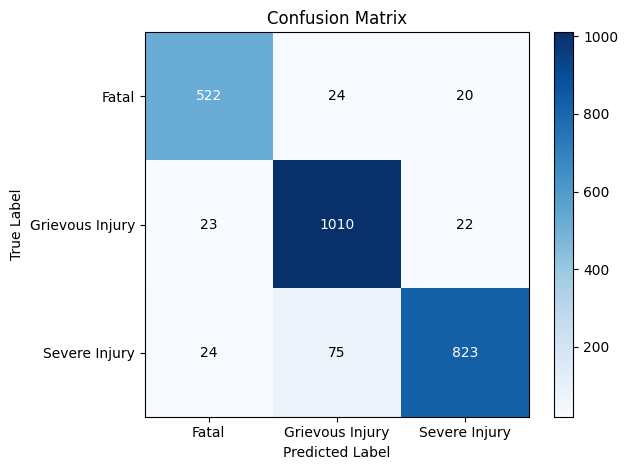

In [ ]:
#confusion matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ["Fatal", "Grievous Injury", "Severe Injury"]

# Define the actual labels
actual_labels = np.argmax(y_test, axis=1)  # Assuming y_test contains the true labels

# Get the predicted labels from the model
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Define the color map
cmap = plt.cm.Blues

# Create the plot
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Set the threshold for color change
threshold = cm.max() / 2

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > threshold else "black")

# Add axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.tight_layout()
plt.show()


**Recurrent Neural Network(RNN)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model

model = Sequential()

# Add the first LSTM layer with 32 units and input shape of (X_train.shape[1], 1)
model.add(LSTM(32, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))

# Add a second LSTM layer with 64 units
model.add(LSTM(64, activation='relu', return_sequences=True))

# Add a third LSTM layer with 128 units
model.add(LSTM(128, activation='relu'))

# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a dense layer with 256 units
model.add(Dense(256, activation='relu'))

# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))

# Add a flatten layer
model.add(Flatten())

# Add a dense layer with 3 units and softmax activation for multi-class classification
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_test, y_test))

#Accuracy
accuracy = model.evaluate(X_test, y_test, verbose=0)
accuracy = accuracy[1]
print(accuracy)

RNN = accuracy  * 100

Epoch 1/40
318/318 [==============================] - 10s 22ms/step - loss: 1.0403 - accuracy: 0.4483 - val_loss: 0.9561 - val_accuracy: 0.5305
Epoch 2/40
318/318 [==============================] - 6s 20ms/step - loss: 0.9306 - accuracy: 0.5551 - val_loss: 0.8729 - val_accuracy: 0.5922
Epoch 3/40
318/318 [==============================] - 7s 22ms/step - loss: 0.8605 - accuracy: 0.6107 - val_loss: 0.8337 - val_accuracy: 0.6233
Epoch 4/40
318/318 [==============================] - 7s 22ms/step - loss: 0.7555 - accuracy: 0.6759 - val_loss: 0.6437 - val_accuracy: 0.7263
Epoch 5/40
318/318 [==============================] - 6s 20ms/step - loss: 0.6673 - accuracy: 0.7224 - val_loss: 0.6379 - val_accuracy: 0.7247
Epoch 6/40
318/318 [==============================] - 7s 22ms/step - loss: 0.6449 - accuracy: 0.7279 - val_loss: 0.6250 - val_accuracy: 0.7298
Epoch 7/40
318/318 [==============================] - 6s 20ms/step - loss: 0.6367 - accuracy: 0.7310 - val_loss: 0.6203 - val_accuracy: 0.729

**Performance Evaluation**

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels to categorical labels if needed
y_test_cat = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_cat, y_pred)
precision = precision_score(y_test_cat, y_pred, average='macro')
recall = recall_score(y_test_cat, y_pred, average='macro')
f1 = f1_score(y_test_cat, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

80/80 [==============================] - 1s 5ms/step
Accuracy: 0.7738891073535195
Precision: 0.7543480588167518
Recall: 0.7375182523771002
F1 Score: 0.7434817203204038
ROC-AUC Score: 0.9163718114226059


80/80 [==============================] - 0s 5ms/step


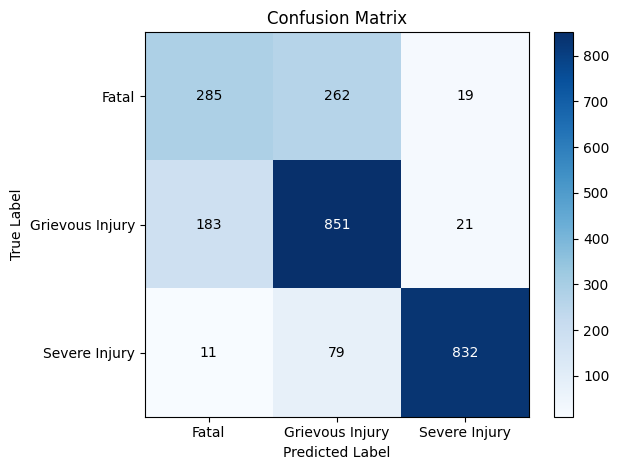

In [ ]:
#confusion matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ["Fatal", "Grievous Injury", "Severe Injury"]

# Define the actual labels
actual_labels = np.argmax(y_test, axis=1)  # Assuming y_test contains the true labels

# Get the predicted labels from the model
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Define the color map
cmap = plt.cm.Blues

# Create the plot
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Set the threshold for color change
threshold = cm.max() / 2

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > threshold else "black")

# Add axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.tight_layout()
plt.show()

**Long Short-Term Memory(LSTM)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Reshape the data for LSTM
n_steps = 1
n_features = X.shape[1]
X_train = X_train.reshape(X_train.shape[0], n_steps, n_features)
X_test = X_test.reshape(X_test.shape[0], n_steps, n_features)

# Define the model
model = Sequential()
model.add(LSTM(32, input_shape=(n_steps, n_features), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
LSTM = score[1] * 100

Epoch 1/40
318/318 [==============================] - 2s 3ms/step - loss: 0.8267 - accuracy: 0.6078 - val_loss: 0.5877 - val_accuracy: 0.7747
Epoch 2/40
318/318 [==============================] - 1s 3ms/step - loss: 0.6087 - accuracy: 0.7393 - val_loss: 0.5333 - val_accuracy: 0.7747
Epoch 3/40
318/318 [==============================] - 1s 3ms/step - loss: 0.5607 - accuracy: 0.7565 - val_loss: 0.5146 - val_accuracy: 0.7747
Epoch 4/40
318/318 [==============================] - 1s 2ms/step - loss: 0.5357 - accuracy: 0.7645 - val_loss: 0.5034 - val_accuracy: 0.7794
Epoch 5/40
318/318 [==============================] - 1s 2ms/step - loss: 0.5303 - accuracy: 0.7628 - val_loss: 0.4963 - val_accuracy: 0.7711
Epoch 6/40
318/318 [==============================] - 1s 2ms/step - loss: 0.5209 - accuracy: 0.7658 - val_loss: 0.4918 - val_accuracy: 0.7747
Epoch 7/40
318/318 [==============================] - 1s 2ms/step - loss: 0.5142 - accuracy: 0.7677 - val_loss: 0.4879 - val_accuracy: 0.7798
Epoch 

**Performance Evaluation**

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels to categorical labels if needed
y_test_cat = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_cat, y_pred)
precision = precision_score(y_test_cat, y_pred, average='macro')
recall = recall_score(y_test_cat, y_pred, average='macro')
f1 = f1_score(y_test_cat, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

80/80 [==============================] - 0s 951us/step


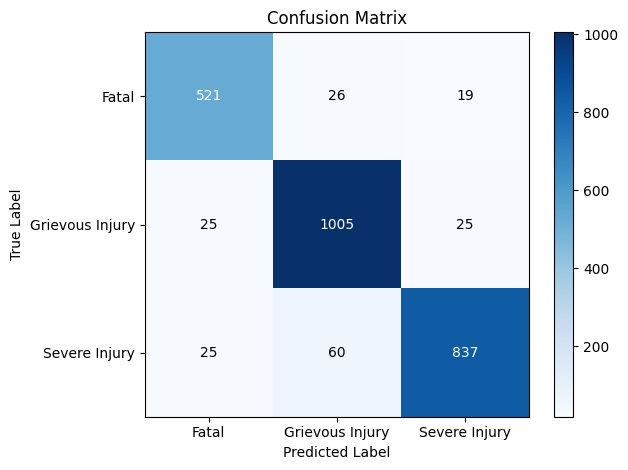

In [ ]:
#confusion matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ["Fatal", "Grievous Injury", "Severe Injury"]

# Define the actual labels
actual_labels = np.argmax(y_test, axis=1)  # Assuming y_test contains the true labels

# Get the predicted labels from the model
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Define the color map
cmap = plt.cm.Blues

# Create the plot
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Set the threshold for color change
threshold = cm.max() / 2

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > threshold else "black")

# Add axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.tight_layout()
plt.show()

**Gated Recurrent Unit(GRU)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Preprocess the data
X = df.drop(['Consequence'], axis=1).values
y = df['Consequence'].values
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
model = Sequential()
model.add(GRU(32, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(64))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=40, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
GRU = score[1] * 100

Epoch 1/40
318/318 [==============================] - 6s 11ms/step - loss: 0.9878 - accuracy: 0.4953 - val_loss: 0.8745 - val_accuracy: 0.5694
Epoch 2/40
318/318 [==============================] - 3s 11ms/step - loss: 0.8424 - accuracy: 0.5850 - val_loss: 0.7319 - val_accuracy: 0.6571
Epoch 3/40
318/318 [==============================] - 3s 9ms/step - loss: 0.6752 - accuracy: 0.6960 - val_loss: 0.5435 - val_accuracy: 0.7562
Epoch 4/40
318/318 [==============================] - 3s 9ms/step - loss: 0.5693 - accuracy: 0.7432 - val_loss: 0.5150 - val_accuracy: 0.7597
Epoch 5/40
318/318 [==============================] - 4s 13ms/step - loss: 0.5493 - accuracy: 0.7472 - val_loss: 0.5230 - val_accuracy: 0.7566
Epoch 6/40
318/318 [==============================] - 4s 13ms/step - loss: 0.5387 - accuracy: 0.7450 - val_loss: 0.5021 - val_accuracy: 0.7633
Epoch 7/40
318/318 [==============================] - 4s 12ms/step - loss: 0.5315 - accuracy: 0.7511 - val_loss: 0.4978 - val_accuracy: 0.7554
E

**performance evaluation**

In [ ]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded labels to categorical labels if needed
y_test_cat = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_cat, y_pred)
precision = precision_score(y_test_cat, y_pred, average='macro')
recall = recall_score(y_test_cat, y_pred, average='macro')
f1 = f1_score(y_test_cat, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)

80/80 [==============================] - 0s 2ms/step
Accuracy: 0.9252850963429021
Precision: 0.9278925423606155
Recall: 0.9223535937670718
F1 Score: 0.9244483420860314
ROC-AUC Score: 0.9768880428562757


80/80 [==============================] - 0s 2ms/step


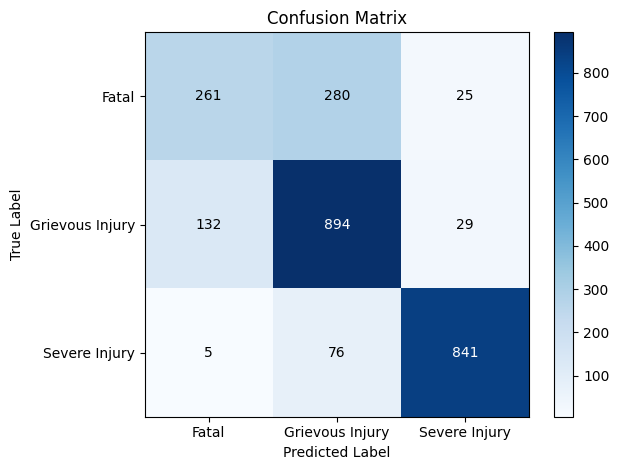

In [ ]:
#confusion matrix

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ["Fatal", "Grievous Injury", "Severe Injury"]

# Define the actual labels
actual_labels = np.argmax(y_test, axis=1)  # Assuming y_test contains the true labels

# Get the predicted labels from the model
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Define the color map
cmap = plt.cm.Blues

# Create the plot
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

# Set the threshold for color change
threshold = cm.max() / 2

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > threshold else "black")

# Add axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.tight_layout()
plt.show()

**Heat Map**

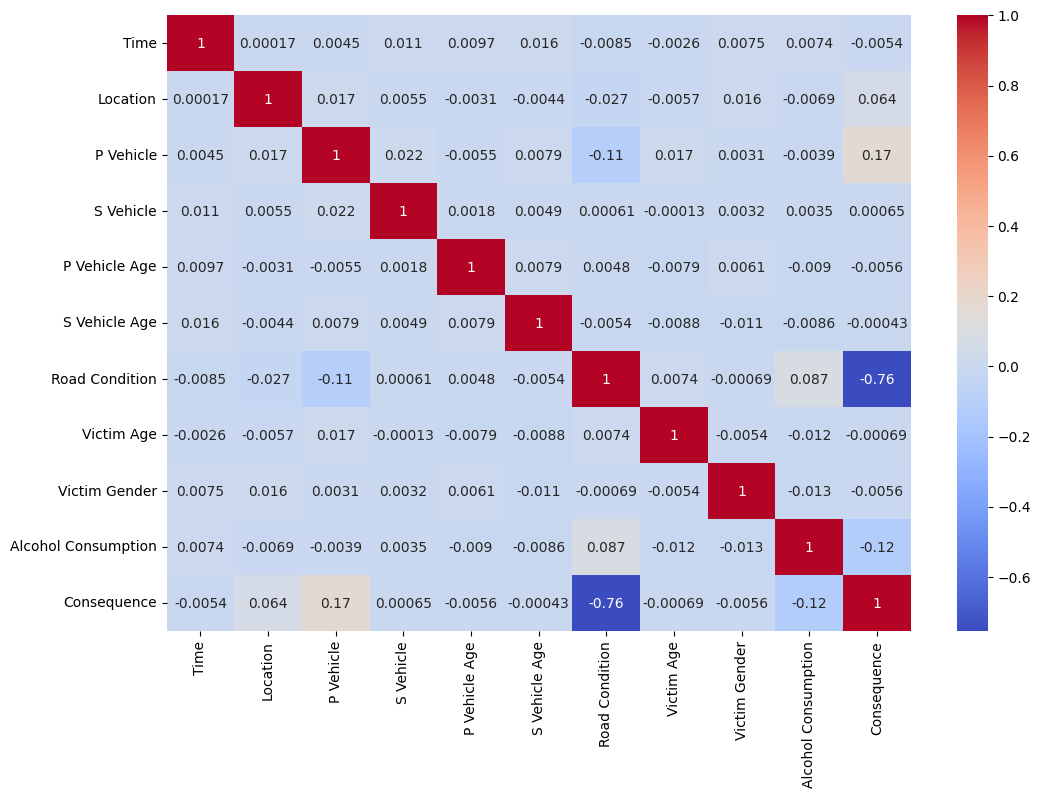

In [ ]:
#Heat Map
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
# Show the plot
plt.show()

**Comparision Of Accuracy Of 4 models(MLP, RNN, LSTM, GRU)**

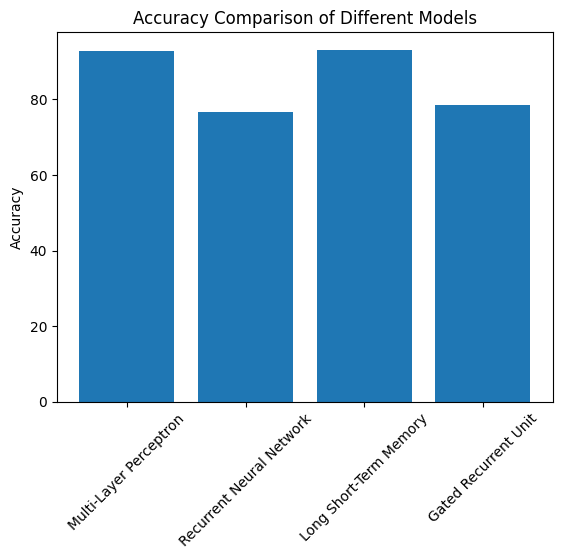

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Multi-Layer Perceptron', 'Recurrent Neural Network', 'Long Short-Term Memory', 'Gated Recurrent Unit']
scores = [92.64, 76.52, 93.07, 78.60]  

plt.bar(np.arange(0, 4, 1), scores)
plt.xticks(np.arange(0, 4, 1), metrics, rotation=45)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.show()